In [16]:
import numpy as np
import matplotlib.pyplot as plt
import model_2D
from numpy import save,load
import seaborn as sns
from pathlib import Path
from ipywidgets import interactive,FloatSlider
import plotting_funcs as plt_funcs
from matplotlib.colors import LogNorm
import data_processing as data_proc
import matplotlib.colors as colors
import statistics as stats_UD

In [17]:
# here all parameters are in mV,s and Hz
w = 2.65
beta = 0.4

I = -1
theta = 10

g = 0.25
model_2D.tau_a = 1

params_sigmoid = [g,theta]
params_weights = [beta,w,I]

In [18]:
path_save = "sdgsdg"

In [19]:
def heatmap_with_bifurcation(matrix,x_grid,y_grid,line1_x,line1_y,line2_x,line2_y,title,xlabel,ylabel,colorbarlabel,round_int = 1,round_int2 = 0,max_float = 100,norm = None,vmin=None, vmax=None,equal_dur = False,saveplot = False,save_path = path_save):
    """This is for the 2D model to plot a heatmap of the different statistics and the corresponding bifurcationlines.
    round_int: to how many digits the numbers on the squares are rounded"""
    params = {'figure.figsize': (20,20),
          'lines.linewidth': 4,
          'legend.fontsize': 20,
         'axes.labelsize': 40,
         'axes.titlesize':45,
         'xtick.labelsize':35,
         'ytick.labelsize':35,
         'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
    plt.rcParams.update(params)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    textcolors=("black", "white")

    x, y = np.meshgrid(x_grid,y_grid)
    dist_x = np.round(x_grid[1]-x_grid[0],2)/2 # calculating half of the distance between to gridpoints to get the ticks into the middle
    dist_y = np.round(y_grid[0]-y_grid[1],2)/2

    # plotting
    ax.plot(line1_x,line1_y,color = "black")#plotting bifurcation lines
    ax.plot(line2_x,line2_y,color = "black",linestyle = "--")
    if equal_dur:
        ax.plot(x_grid,-0.2*x_grid+2.4,color = "red",linewidth = 4)
    # extent set such that the ticks are in the middle of the squares
    heatmap = ax.imshow(matrix,extent=[x.min()-dist_x, x.max()+dist_x, y.min()-dist_y, y.max()+dist_y], origin = "upper",cmap = "plasma",aspect = 4,norm = norm,vmin = vmin,vmax = vmax)
    cbar = fig.colorbar(heatmap, ax=ax,shrink = 0.75)#fraction can resize the colorbar
    cbar.set_label(colorbarlabel,fontsize = 40)
    ax.set_xticks(x_grid)
    ax.set_yticks(y_grid)
    ax.set_xticklabels(np.round(x_grid,2), rotation=90) # rotate the xticks such that still readable for more comma vals
    ax.set_yticklabels(np.round(y_grid,2))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Loop over data dimensions and create text annotations.
    for (idxi,i) in enumerate(y_grid):
        for (idxj,j) in enumerate(x_grid):
            if not np.isnan(matrix[idxi, idxj]):# do not want to display the nan values
                if np.round(matrix[idxi, idxj],round_int) < max_float:
                    text = ax.text(j, i, np.round(matrix[idxi, idxj],round_int),
                               ha="center", va="center", color=textcolors[int(heatmap.norm(matrix[idxi, idxj]) < 0.5)],size = 18)# might need to reset threshold for other graphics
                else:
                    if round_int2 == 0:
                        text = ax.text(j, i, int(np.round(matrix[idxi, idxj],round_int2)),
                               ha="center", va="center", color=textcolors[int(heatmap.norm(matrix[idxi, idxj]) < 0.5)],size = 18)
                    else:
                        text = ax.text(j, i, np.round(matrix[idxi, idxj],round_int2),
                               ha="center", va="center", color=textcolors[int(heatmap.norm(matrix[idxi, idxj]) < 0.5)],size = 18)
            
                    
    # possibility to save the plot
    if saveplot:
        plt.savefig(save_path,dpi=200)
    plt.show()



In [20]:
main_path_mult = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 600/grid_mult2/')
main_path_add_noadaptNoiseconst = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 600/grid_add_noadaptnoise_const/')
main_path_add_noadaptNoiseconsthigh = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 600/grid_add_noadaptnoise_consthigh/')
main_path_add_noadaptNoiseconstlow = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 600/grid_add_noadaptnoise_constlow/')

In [21]:
main_path_mult2 = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 600/grid_mult/')
main_path_mult3 = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 600/grid_mult3/')
main_path_mult4 = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 600/grid_mult4/')
main_path_mult5 = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 600/grid_mult5/')

In [22]:
path_matcont = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/Matcont_bifurcation_data/2D Model/b = 0.4/tau_a = 1/')

In [23]:
stats_mult = data_proc.load_stats_data(main_path_mult)
stats_mult2 = data_proc.load_stats_data(main_path_mult2)
stats_mult3 = data_proc.load_stats_data(main_path_mult3)
stats_mult4 = data_proc.load_stats_data(main_path_mult4)
stats_mult5 = data_proc.load_stats_data(main_path_mult5)


stats_add_noadaptconst = data_proc.load_stats_data(main_path_add_noadaptNoiseconst)
stats_add_noadaptconsthigh = data_proc.load_stats_data(main_path_add_noadaptNoiseconsthigh)
stats_add_noadaptconstlow = data_proc.load_stats_data(main_path_add_noadaptNoiseconstlow)

In [24]:
hopf_x = load(Path.joinpath(path_matcont, "hopf_curve_x.npy"))
hopf_y = load(Path.joinpath(path_matcont, "hopf_curve_y.npy"))
cusp_x = load(Path.joinpath(path_matcont, "cusp_curve_x.npy"))
cusp_y = load(Path.joinpath(path_matcont, "cusp_curve_y.npy"))

In [25]:
percUp_mult = stats_mult[0]
percDown_mult = stats_mult[1]
meanUp_mult = stats_mult[2]
meanDown_mult = stats_mult[3]
cvUp_mult = stats_mult[4]
cvDown_mult = stats_mult[5]
scc0_mult = stats_mult[6]
scc1_mult = stats_mult[7]

In [26]:
percUp_add = stats_add_noadaptconst[0]
percDown_add = stats_add_noadaptconst[1]
meanUp_add = stats_add_noadaptconst[2]
meanDown_add = stats_add_noadaptconst[3]
cvUp_add = stats_add_noadaptconst[4]
cvDown_add = stats_add_noadaptconst[5]
scc0_add = stats_add_noadaptconst[6]
scc1_add = stats_add_noadaptconst[7]

In [12]:
np.dstack((percUp_add,percDown_add)).shape

(30, 23, 2)

In [13]:
stats_add_noadaptconst

(array([[      nan,       nan,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan,       nan],
        [9.988e+01, 9.989e+01,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan,       nan],
        [9.962e+01, 9.984e+01,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan,       nan],
        [9.796e+01, 9.889e+01, 9.975e+01, 9.986e+01,       nan,       nan,
               nan,       nan,       nan,       nan,   

In [28]:
from sklearn.model_selection import ParameterGrid
I_grid = np.arange(-1,4.75,0.25)
w_grid = np.arange(1.5,2.95,0.05)
w_grid = w_grid[::-1] # reversing from big to small values

param_grid = {'I': I_grid,'w': w_grid}
grid = list(ParameterGrid(param_grid))
rows_matrix = len(w_grid)
cols_matrix = len(I_grid)

In [29]:
w_loc = 6 #6
I_loc = 0#0

In [30]:
def stderror_on_mean(data):
    mean = np.mean(data)
    std_error = np.std(data)/np.sqrt(len(data))

    return mean,std_error

In [31]:
stats_names = [percUp_trials,percDown_trials]

NameError: name 'percUp_trials' is not defined

In [32]:
def stats_with_errorbars(set_of_stats,w_loc,I_loc):
    stats1,stats2,stats3,stats4,stats5 = set_of_stats
    mean_stats = []
    err_stats = []
    
    for i in range(len(stats1)):
        stats_trials = np.dstack((stats1[i],stats2[i],stats3[i],stats4[i],stats5[i]))
        stats_trials_loc = stats_trials[w_loc,I_loc,:]
        mean,std_err = stats_UD.stderror_on_mean(stats_trials_loc)
        mean_stats.append(mean)
        err_stats.append(std_err)
        
    return mean_stats,err_stats

In [33]:
mult_stats = [stats_mult,stats_mult2,stats_mult3,stats_mult4,stats_mult5]

In [34]:
mean_mult,err_mult = stats_with_errorbars(mult_stats,6,0)

In [35]:
stats_names_1 = ["PercUp","PercDown"]
stats_names_2 = ["MeanUp","MeanDown"]
stats_names_3 = ["CVUp","CVDown"]
stats_names_4 = [r"SCC D$\rightarrow$U",r"SCC U$\rightarrow$D"]

In [36]:
err_mult

[0.11748702055971948,
 0.11748702055972006,
 0.00691002434967337,
 0.022118289212385688,
 0.0037043306881427715,
 0.003581064520203523,
 0.012422854017237724,
 0.015077641341540523]

In [37]:
params = {'figure.figsize': (14,10),
          'lines.linewidth': 4,
          'legend.fontsize': 20,
         'axes.labelsize': 25,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':20,#30
         'ytick.labelsize':20,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)

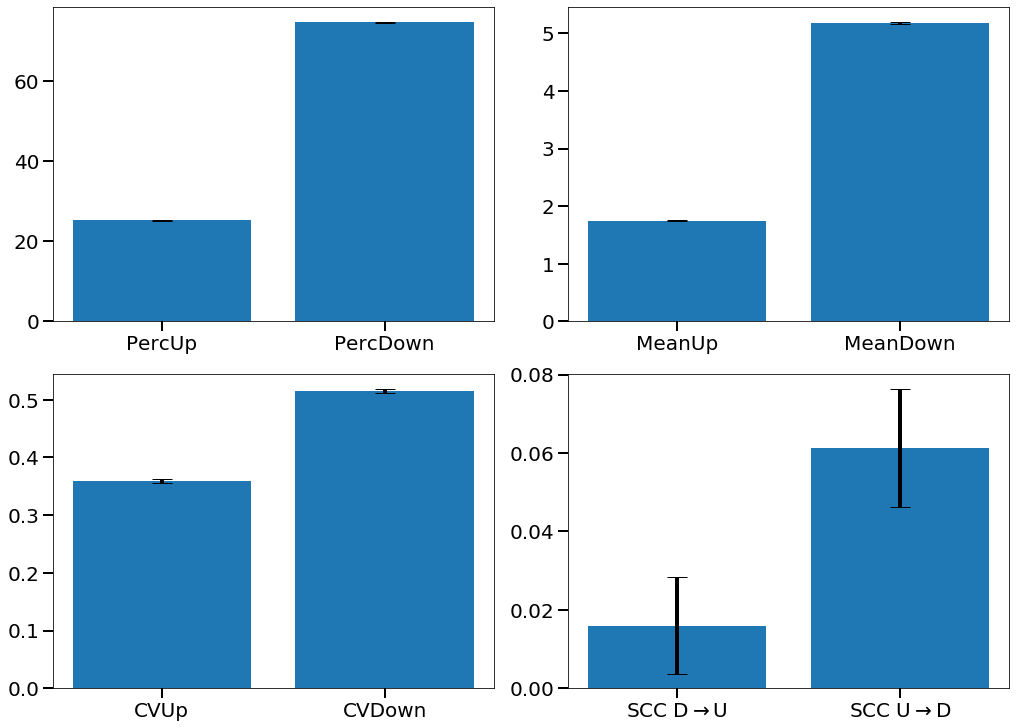

In [38]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (14,10))
ax1.bar(np.arange(0,2),mean_mult[:2], yerr=err_mult[:2], align='center',capsize=10)
ax1.set_xticks([0,1])
ax1.set_xticklabels(stats_names_1)

ax2.bar(np.arange(0,2),mean_mult[2:4], yerr=err_mult[2:4], align='center',capsize=10)
ax2.set_xticks([0,1])
ax2.set_xticklabels(stats_names_2)

ax3.bar(np.arange(0,2),mean_mult[4:6], yerr=err_mult[4:6], align='center',capsize=10)
ax3.set_xticks([0,1])
ax3.set_xticklabels(stats_names_3)

ax4.bar(np.arange(0,2),mean_mult[6:8], yerr=err_mult[6:8], align='center',capsize=10)
ax4.set_xticks([0,1])
ax4.set_xticklabels(stats_names_4)
plt.show()

In [39]:
percUp_mult[w_loc,I_loc],meanUp_mult[w_loc,I_loc],meanDown_mult[w_loc,I_loc]

(25.54, 1.762413118527067, 5.13880552359031)

In [40]:
#10,3 = 2.45,-0.25 und 6,0 = 2.65.0

In [41]:
# find areas with highest similarity
perc_up_match = np.logical_and(percUp_mult[w_loc,I_loc]-2<percUp_add, percUp_add<percUp_mult[w_loc,I_loc]+2)
mean_up_match = np.logical_and(meanUp_mult[w_loc,I_loc]-0.1<meanUp_add, meanUp_add<meanUp_mult[w_loc,I_loc]+0.1)
mean_down_match = np.logical_and(meanDown_mult[w_loc,I_loc]-0.3<meanDown_add, meanDown_add<meanDown_mult[w_loc,I_loc]+0.3)
cv_up_match = np.logical_and(cvUp_mult[w_loc,I_loc]-0.02<cvUp_add, cvUp_add<cvUp_mult[w_loc,I_loc]+0.02)
cv_down_match = np.logical_and(cvDown_mult[w_loc,I_loc]-0.02<cvDown_add, cvDown_add<cvDown_mult[w_loc,I_loc]+0.02)
scc0_match = np.logical_and(scc0_mult[w_loc,I_loc]-0.02<scc0_add, scc0_add<scc0_mult[w_loc,I_loc]+0.02)
scc1_match = np.logical_and(scc1_mult[w_loc,I_loc]-0.02<scc1_add, scc0_add<scc1_mult[w_loc,I_loc]+0.02)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


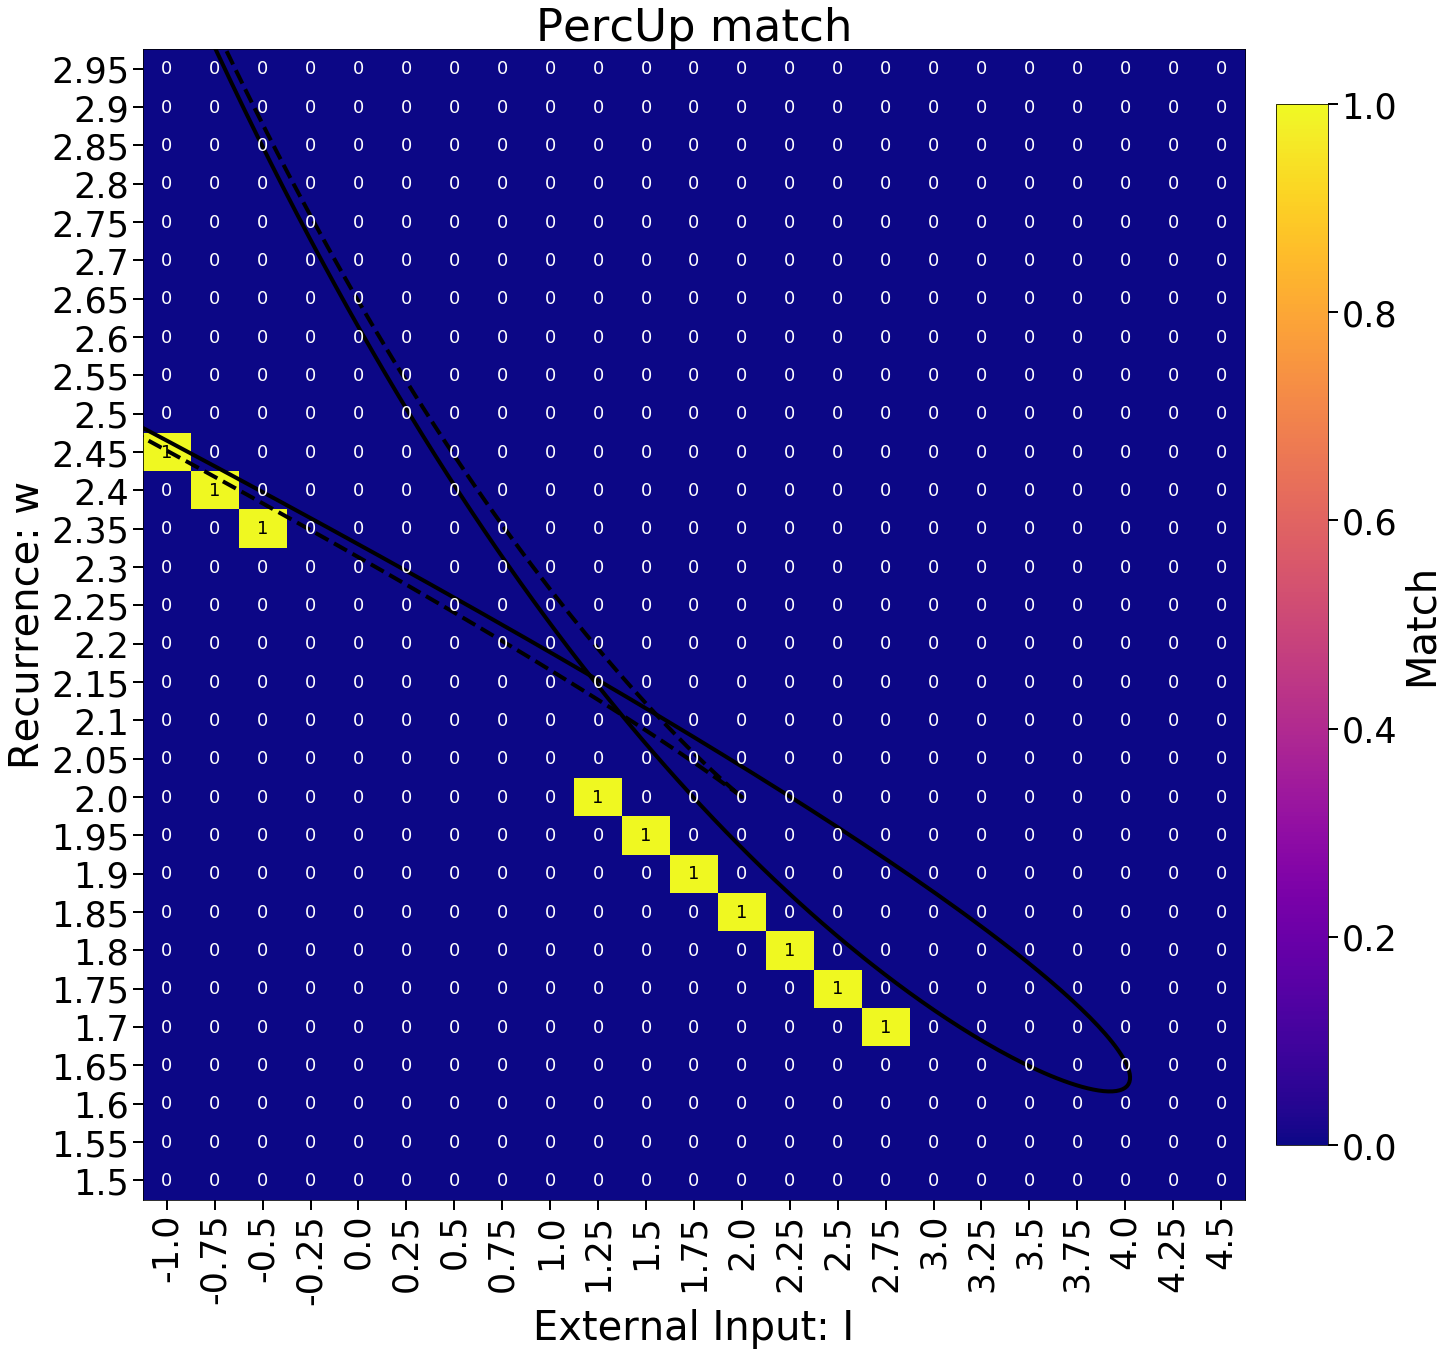

In [42]:
heatmap_with_bifurcation(perc_up_match*1,I_grid,w_grid,hopf_x,hopf_y,cusp_x,cusp_y,r"PercUp match","External Input: I","Recurrence: w","Match",round_int = 2,equal_dur = False,saveplot = False)

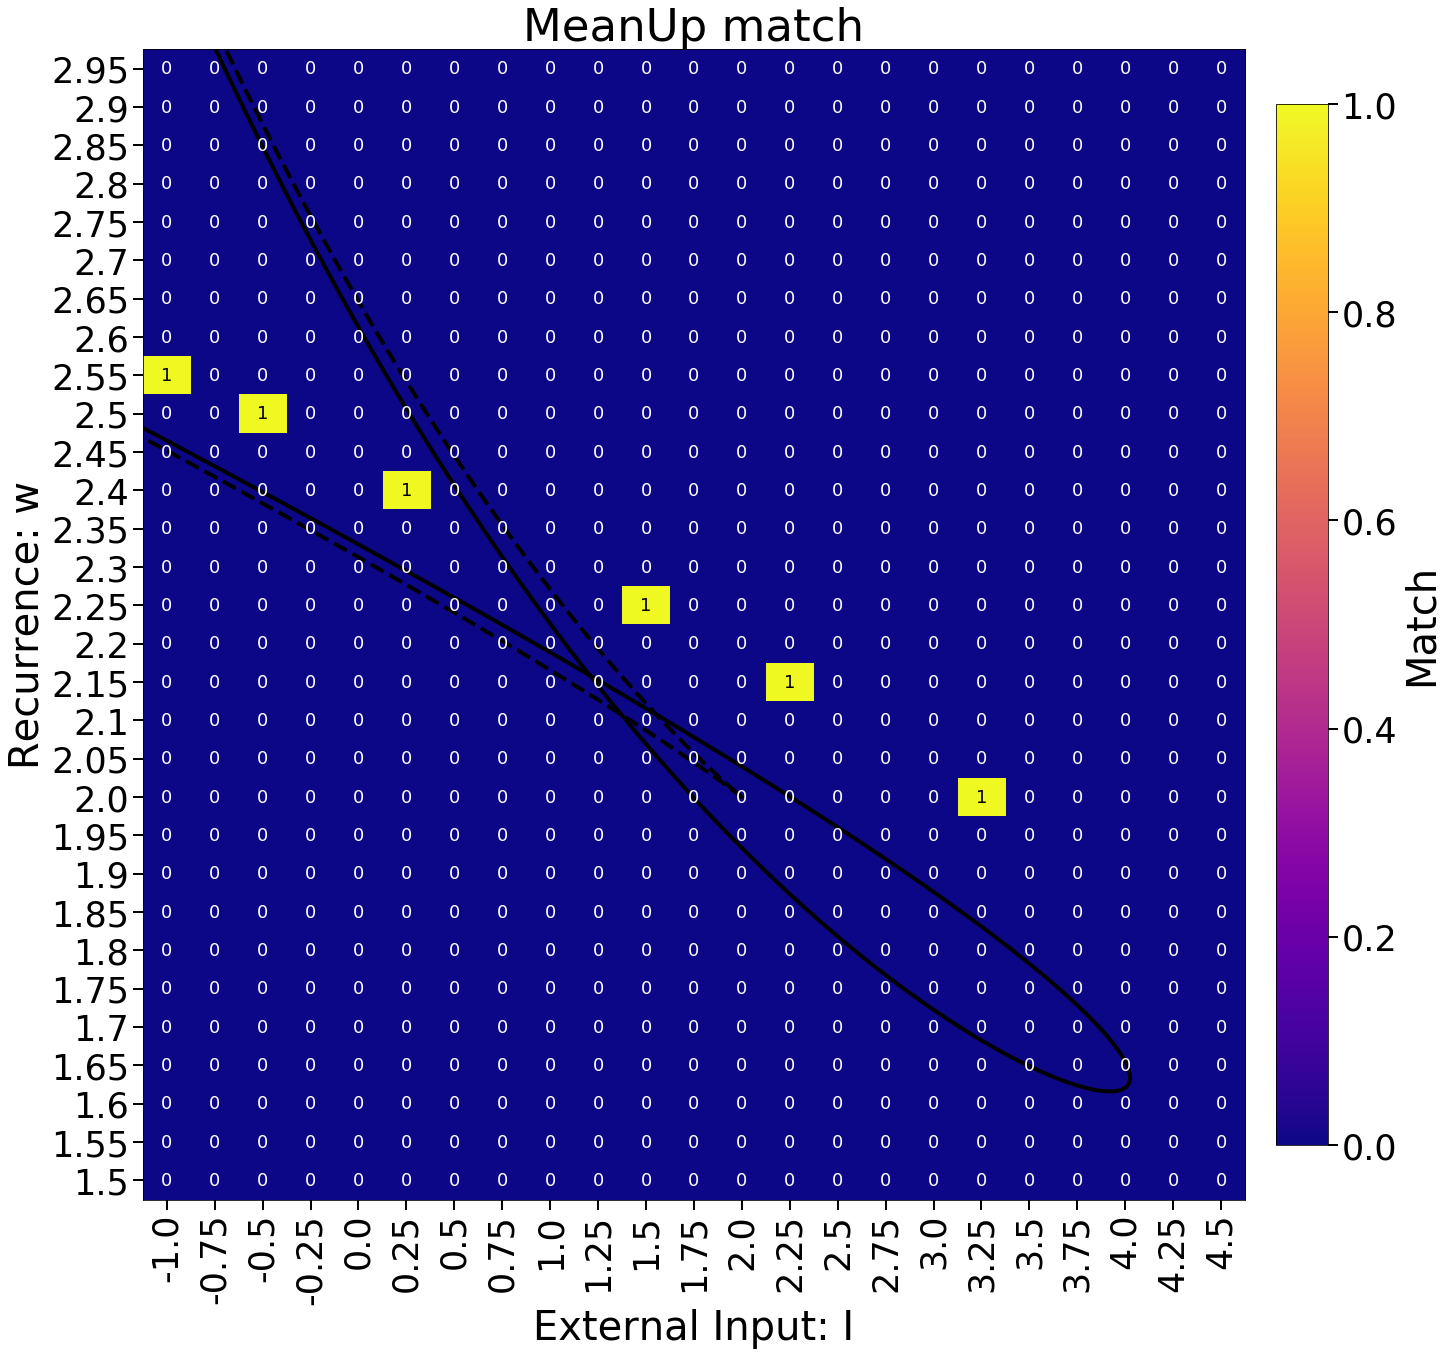

In [188]:
heatmap_with_bifurcation(mean_up_match*1,I_grid,w_grid,hopf_x,hopf_y,cusp_x,cusp_y,r"MeanUp match","External Input: I","Recurrence: w",r"Match",round_int = 2,equal_dur = False,saveplot = False)

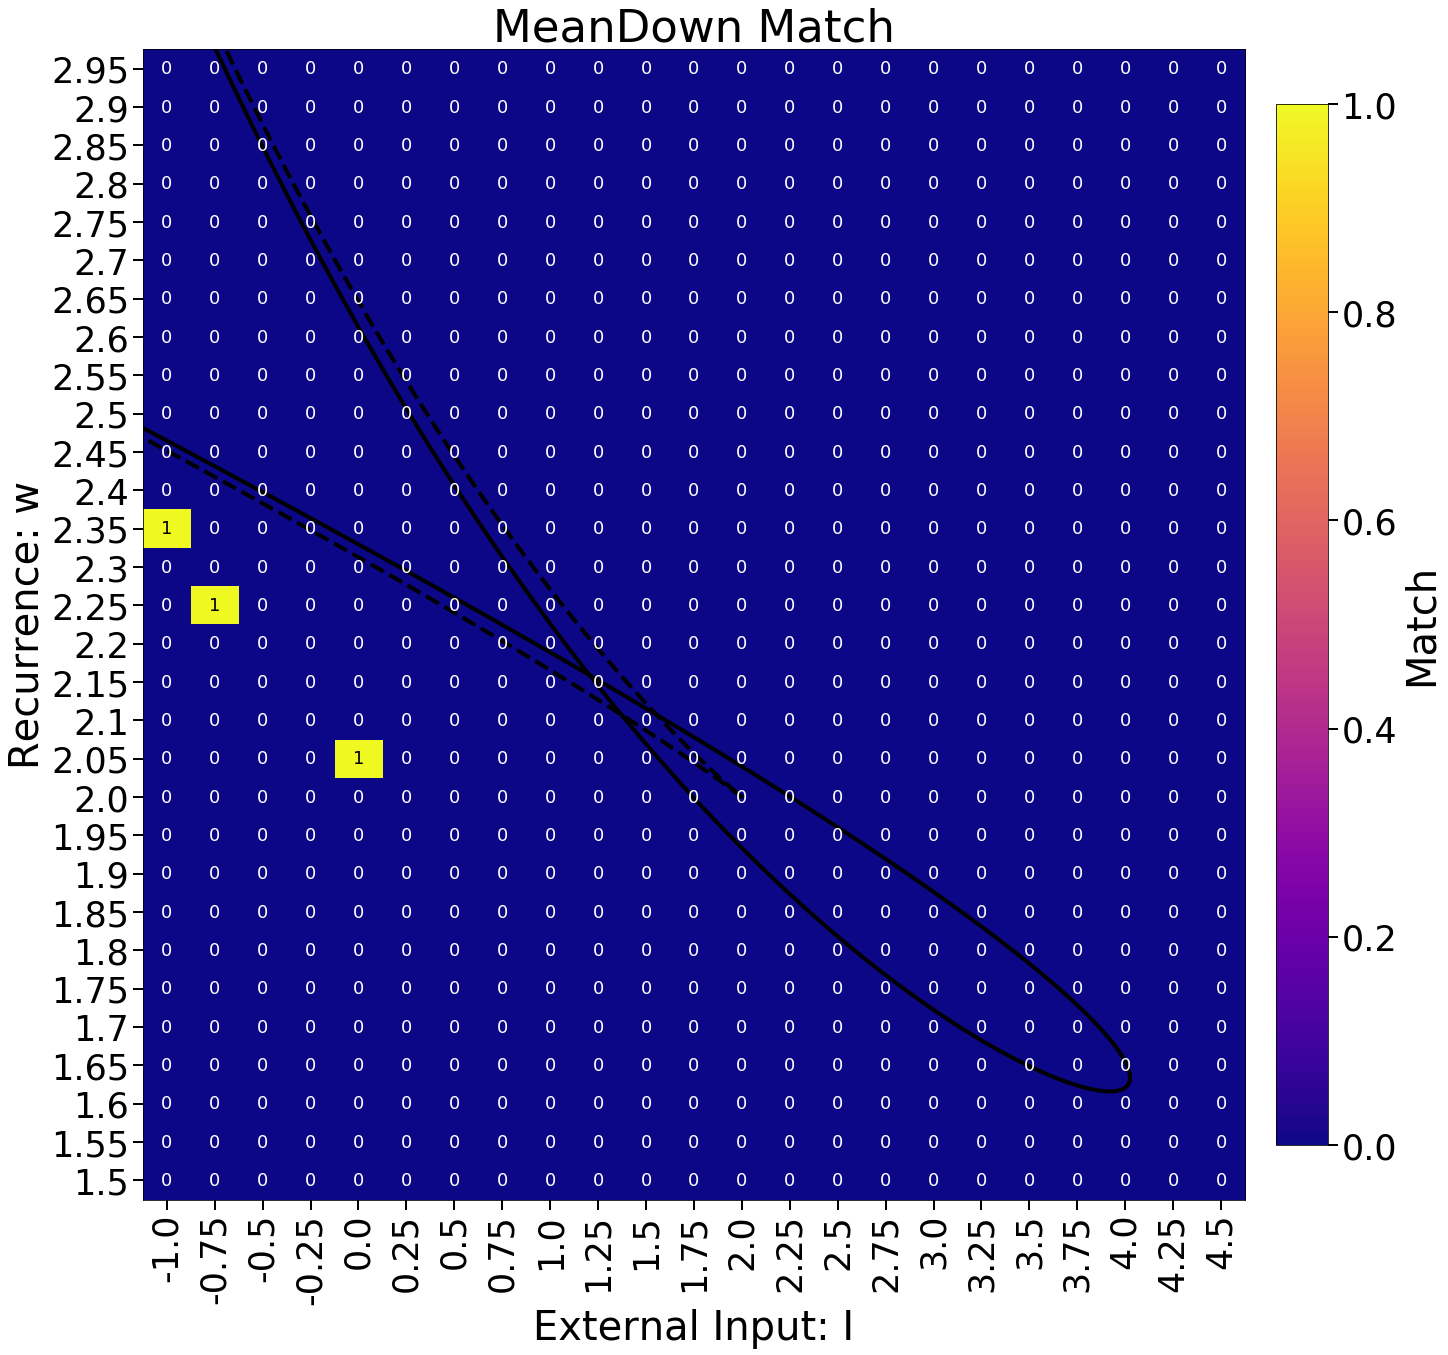

In [189]:
heatmap_with_bifurcation(mean_down_match*1,I_grid,w_grid,hopf_x,hopf_y,cusp_x,cusp_y,r"MeanDown Match","External Input: I","Recurrence: w",r"Match",round_int = 2,equal_dur = False,saveplot = False)

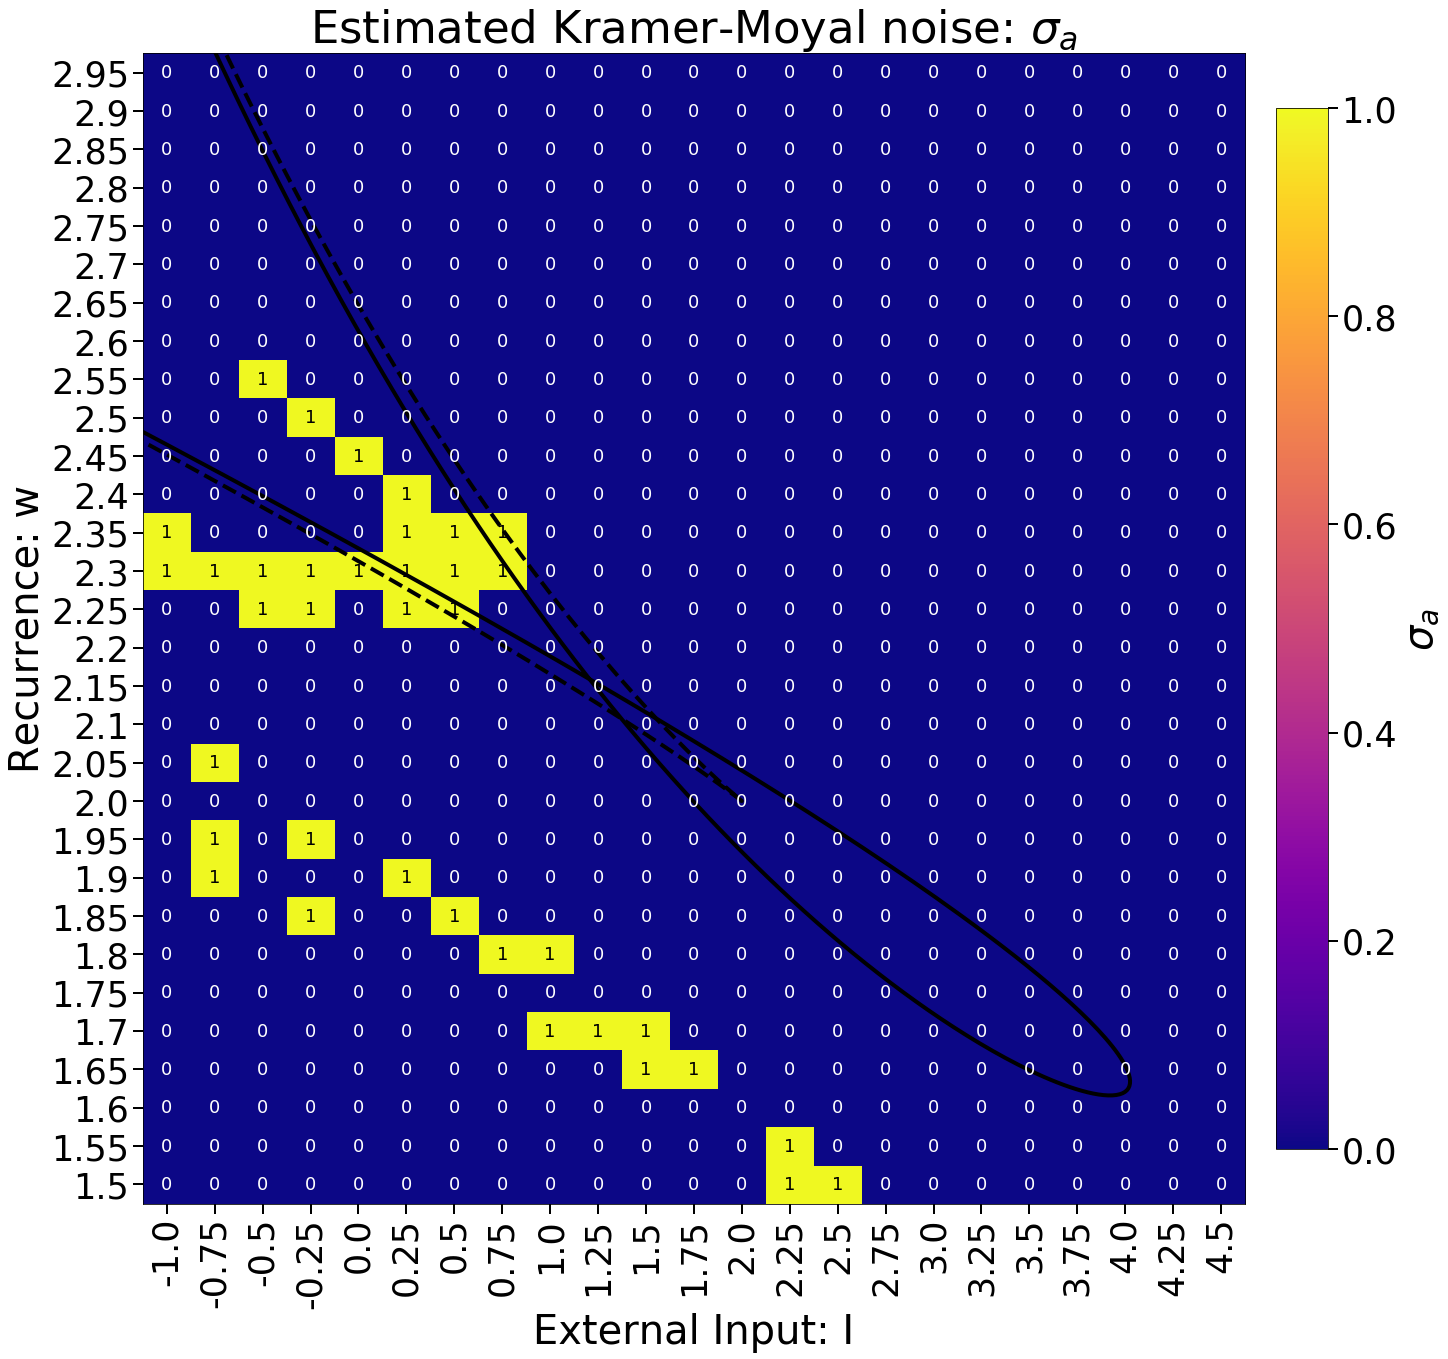

In [54]:
heatmap_with_bifurcation(cv_up_match*1,I_grid,w_grid,hopf_x,hopf_y,cusp_x,cusp_y,r"Estimated Kramer-Moyal noise: $\sigma_a$","External Input: I","Recurrence: w",r"$\sigma_a$",round_int = 2,equal_dur = False,saveplot = False)

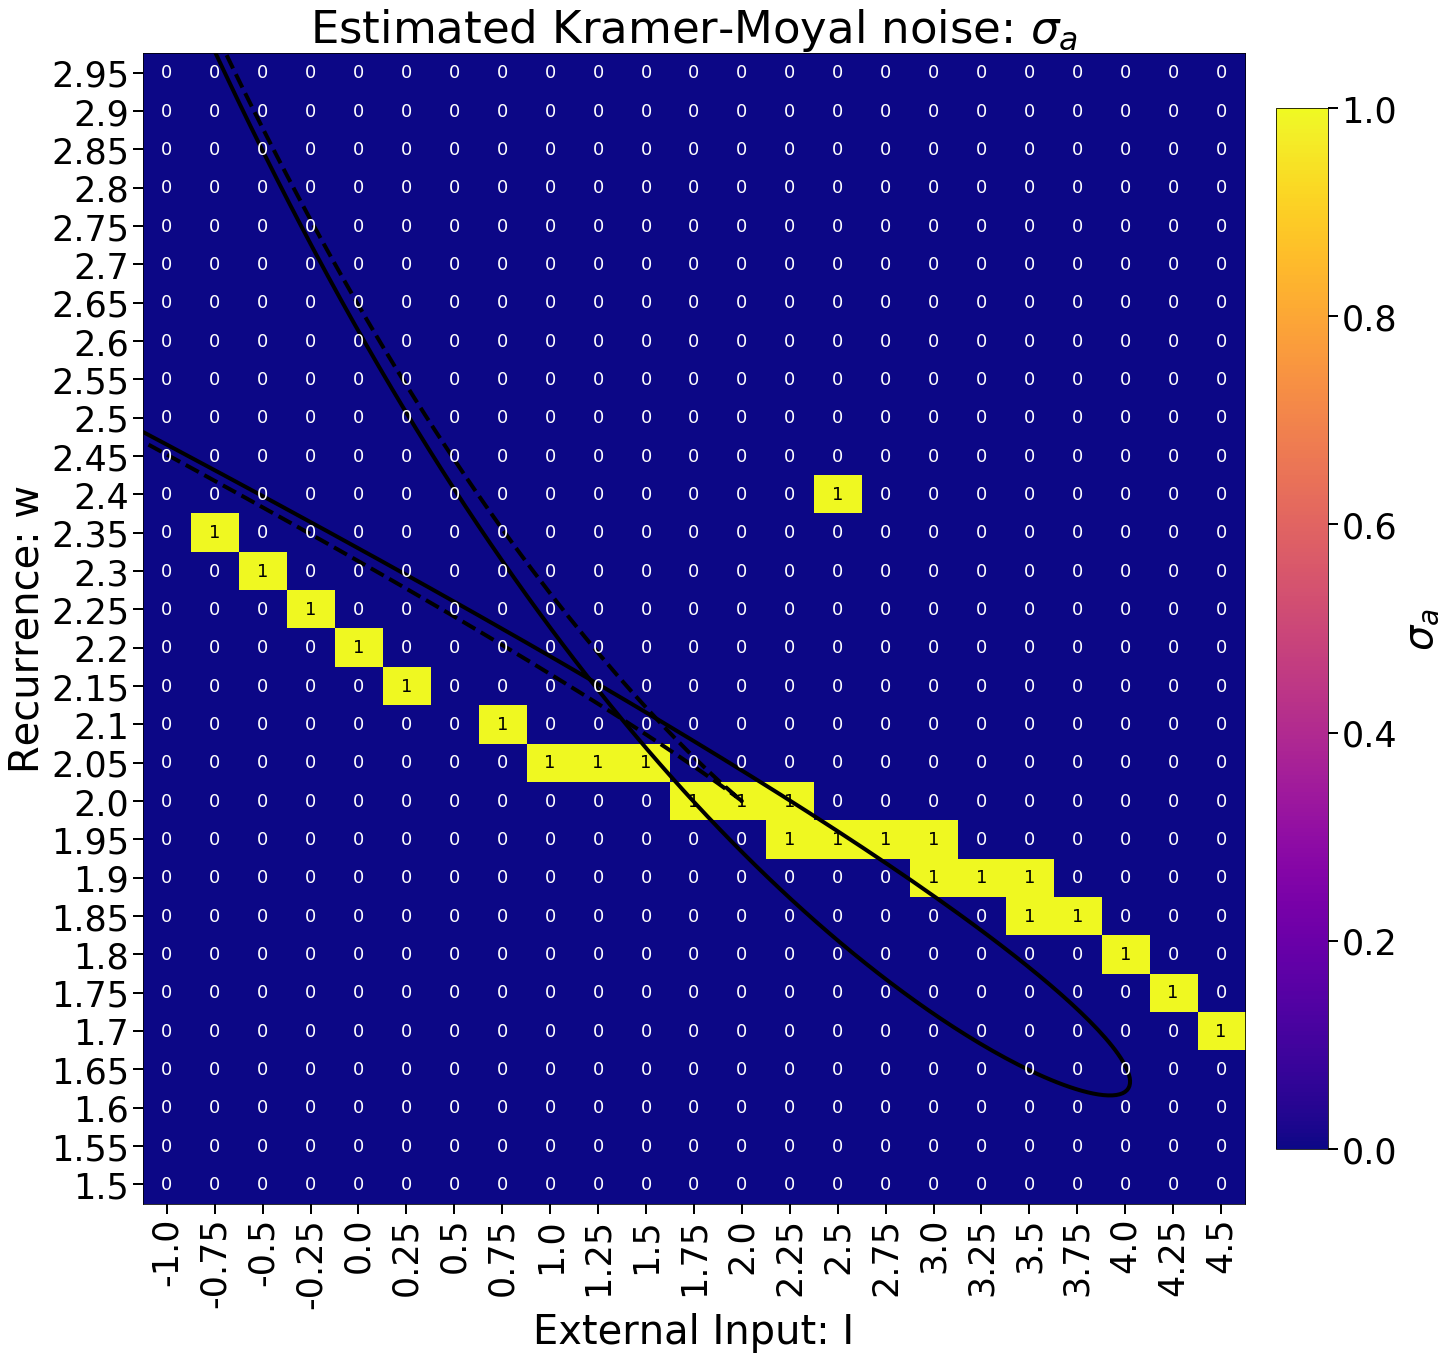

In [56]:
heatmap_with_bifurcation(cv_down_match*1,I_grid,w_grid,hopf_x,hopf_y,cusp_x,cusp_y,r"Estimated Kramer-Moyal noise: $\sigma_a$","External Input: I","Recurrence: w",r"$\sigma_a$",round_int = 2,equal_dur = False,saveplot = False)

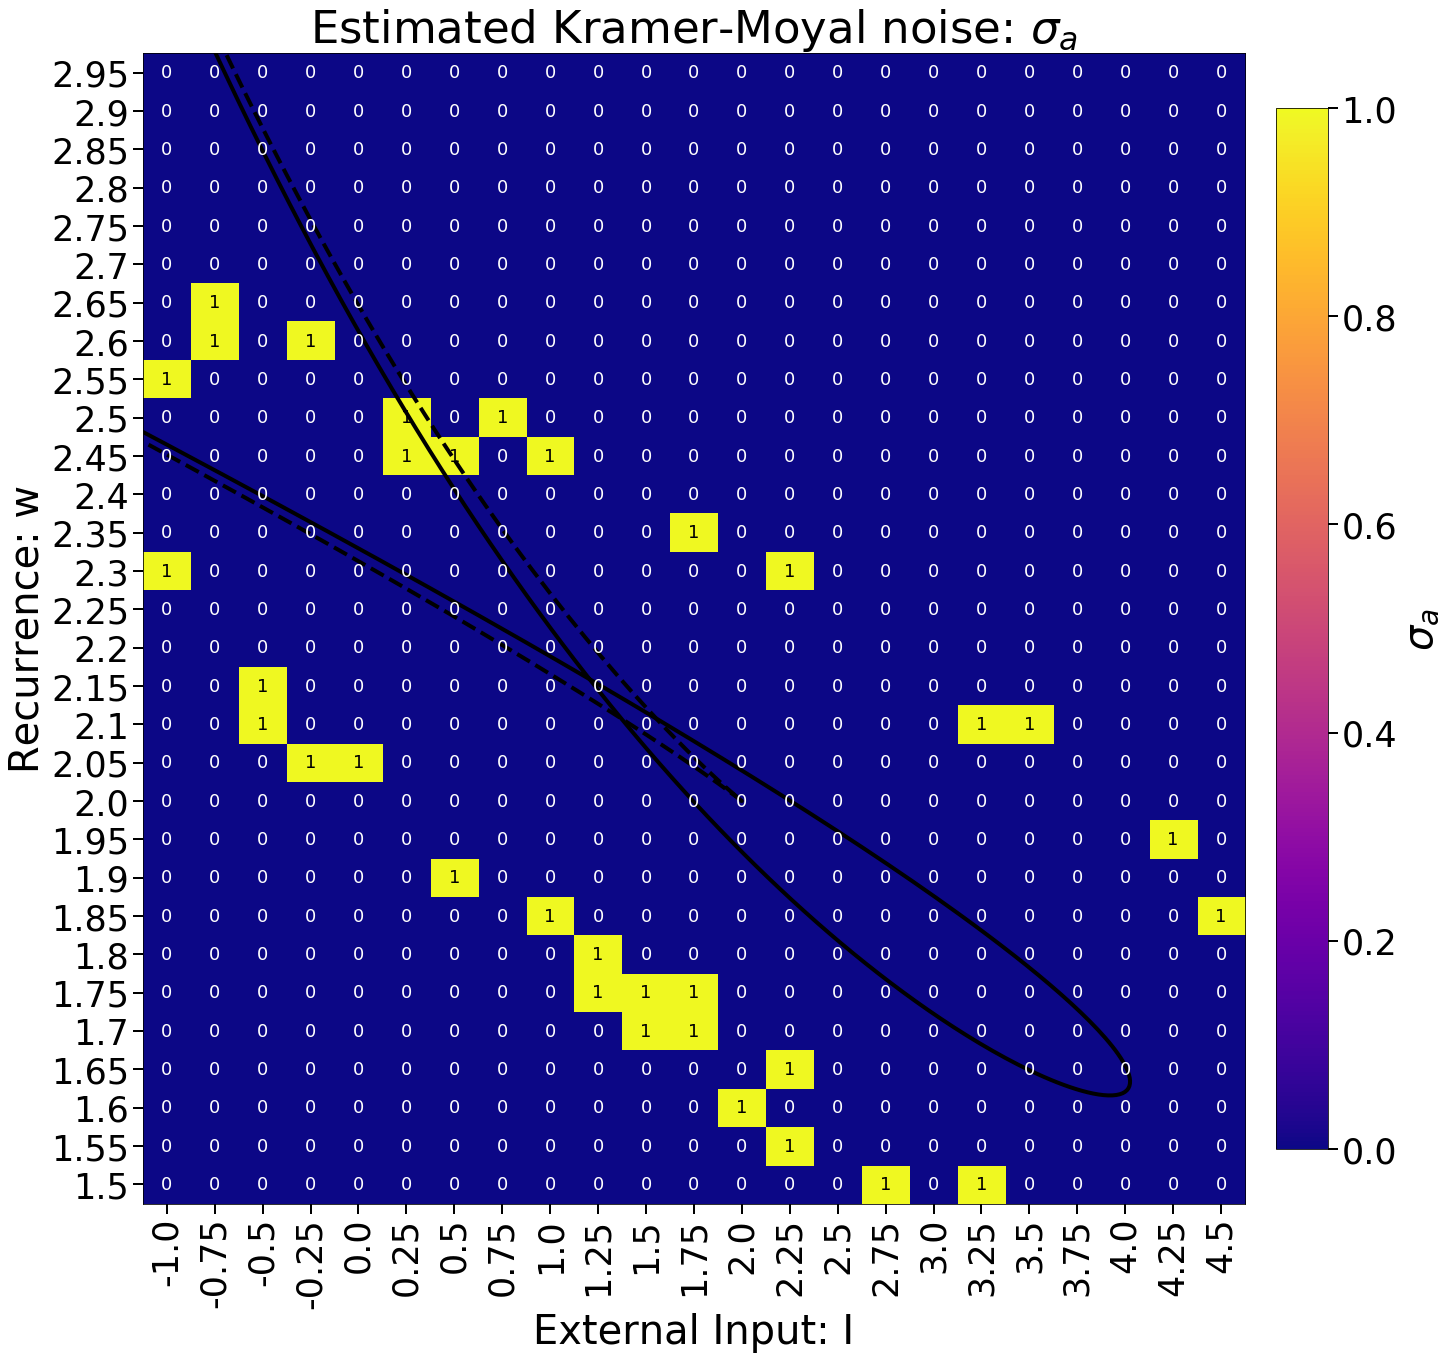

In [59]:
heatmap_with_bifurcation(scc0_match*1,I_grid,w_grid,hopf_x,hopf_y,cusp_x,cusp_y,r"Estimated Kramer-Moyal noise: $\sigma_a$","External Input: I","Recurrence: w",r"$\sigma_a$",round_int = 2,equal_dur = False,saveplot = False)

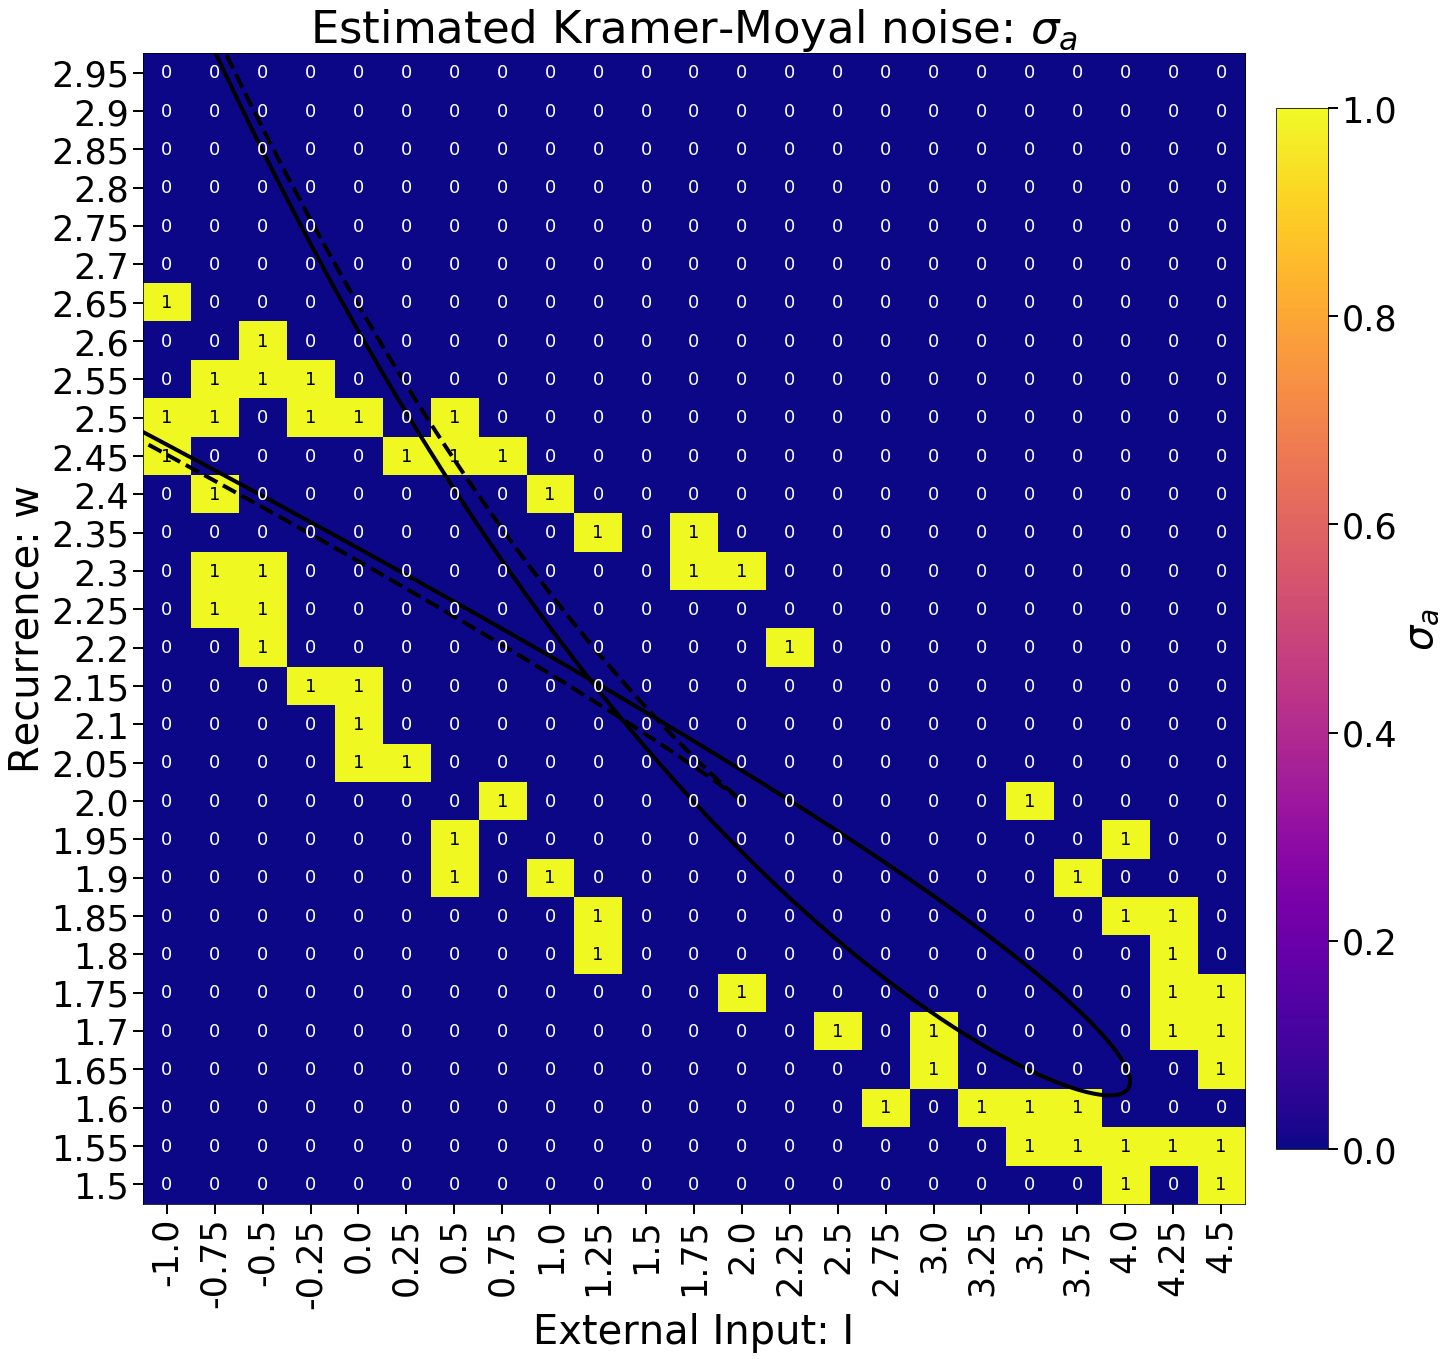

In [60]:
heatmap_with_bifurcation(scc1_match*1,I_grid,w_grid,hopf_x,hopf_y,cusp_x,cusp_y,r"Estimated Kramer-Moyal noise: $\sigma_a$","External Input: I","Recurrence: w",r"$\sigma_a$",round_int = 2,equal_dur = False,saveplot = False)

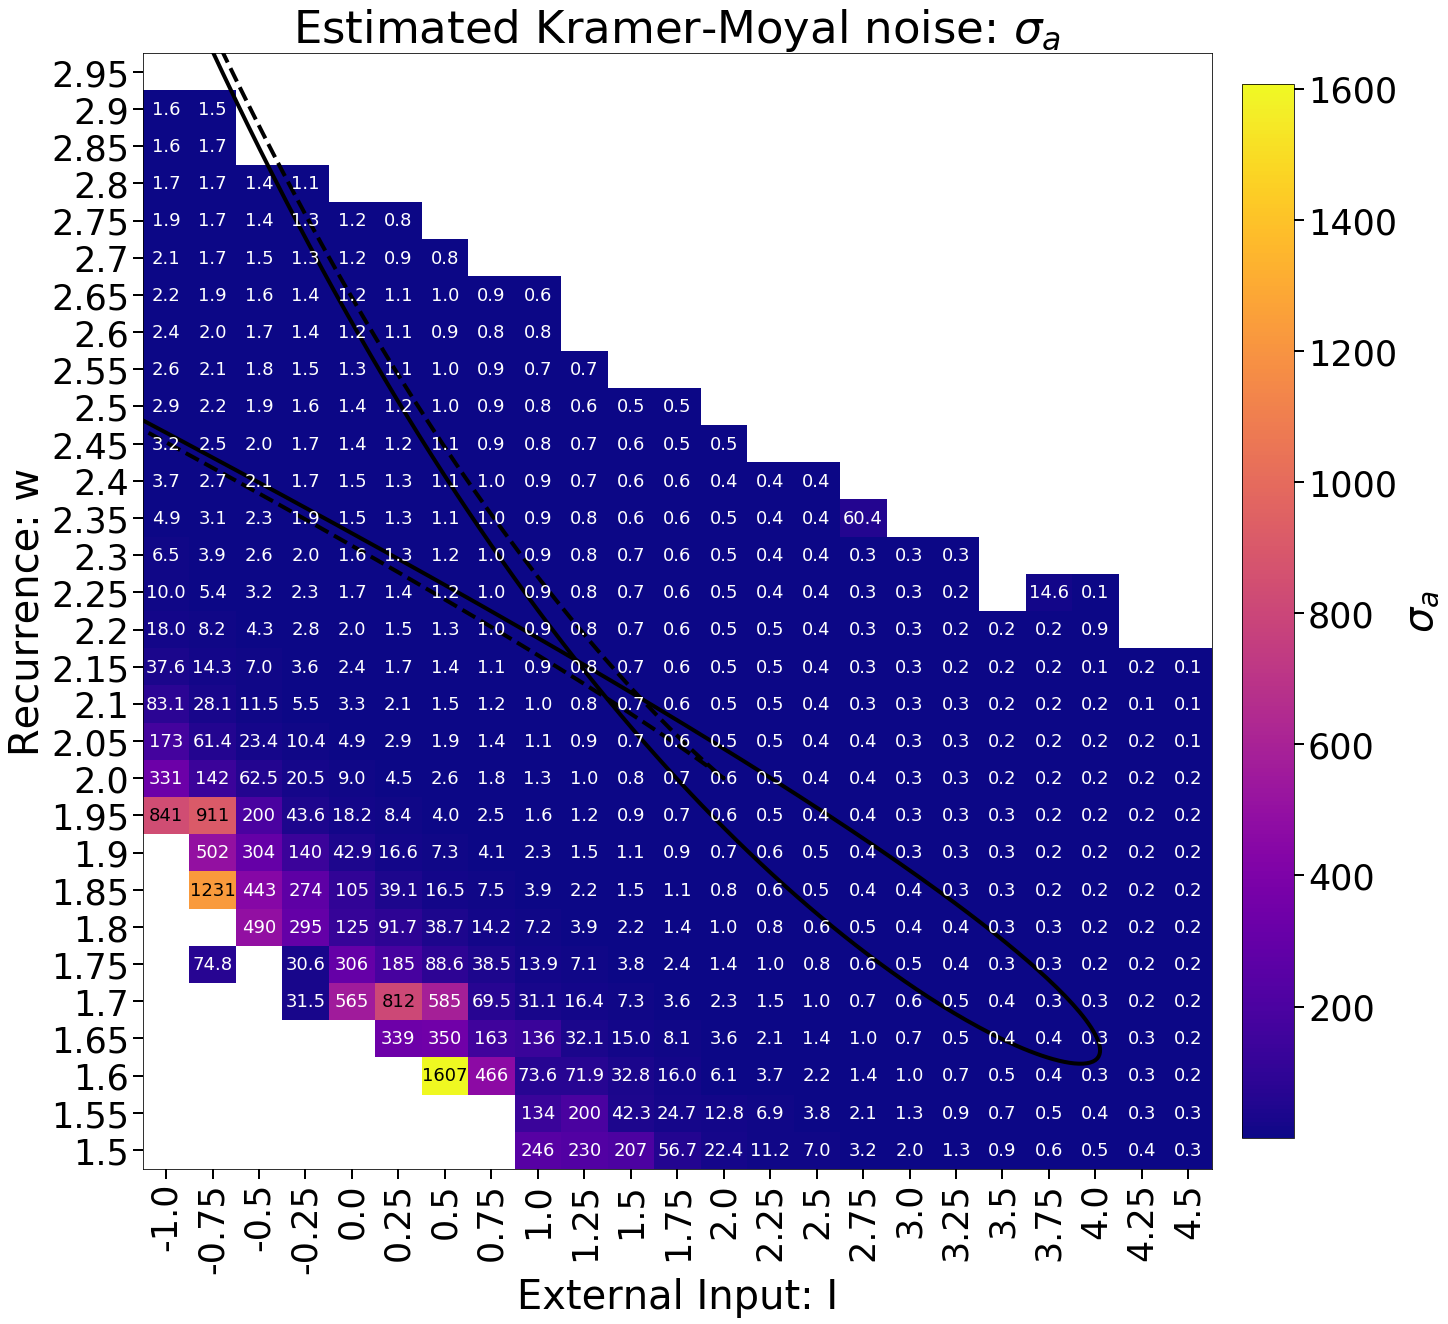

In [43]:
heatmap_with_bifurcation(meanDown_add,I_grid,w_grid,hopf_x,hopf_y,cusp_x,cusp_y,r"Estimated Kramer-Moyal noise: $\sigma_a$","External Input: I","Recurrence: w",r"$\sigma_a$",round_int = 1,equal_dur = False,saveplot = False)

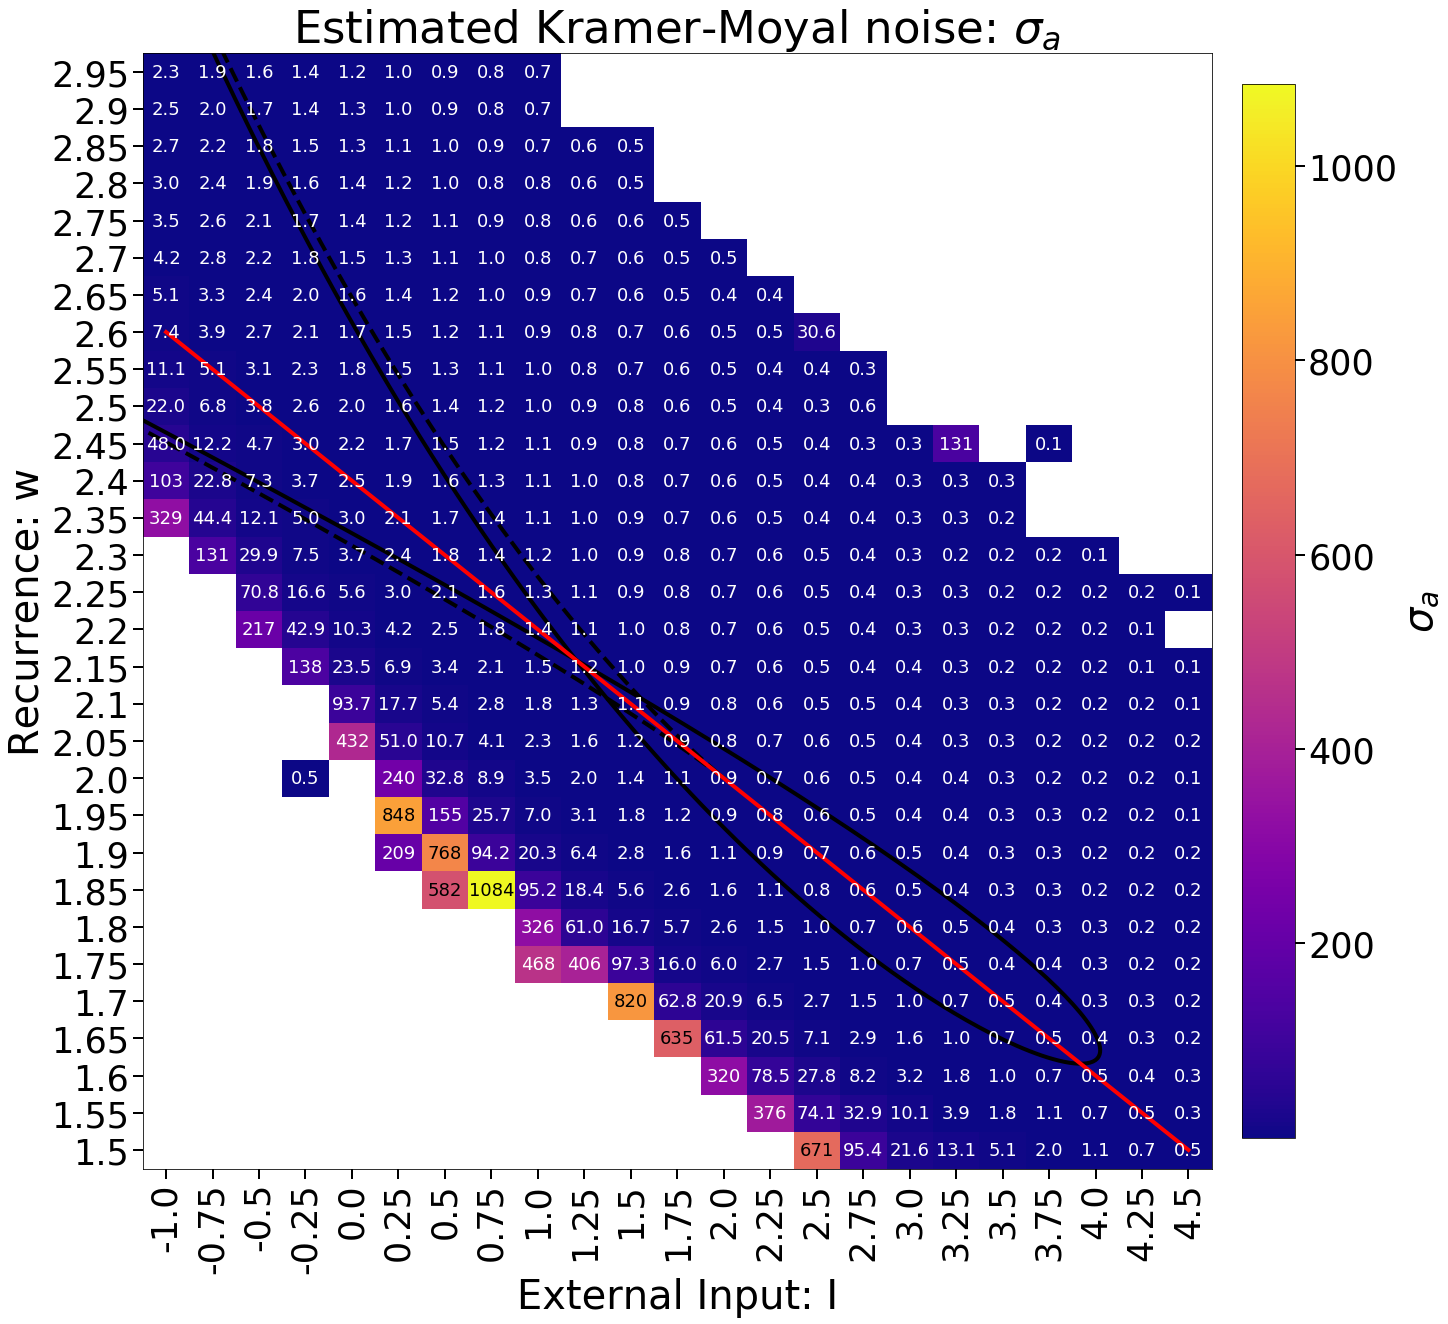

In [70]:
heatmap_with_bifurcation(meanDown_mult,I_grid,w_grid,hopf_x,hopf_y,cusp_x,cusp_y,r"Estimated Kramer-Moyal noise: $\sigma_a$","External Input: I","Recurrence: w",r"$\sigma_a$",round_int = 1,equal_dur = True,saveplot = False)

# Scatterplot combinations

In [43]:
path_regime_class = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/regimes_b_04/')
path_w_matrix = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/')

regime_matrix = load(Path.joinpath(path_regime_class, "regime_matrix.npy"))
w_matrix = load(Path.joinpath(path_w_matrix, 'w_matrix.npy'))

In [44]:
main_path_add_noadaptNoiseconst = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 600/grid_add_noadaptnoise_const/')

In [45]:
stats_add = data_proc.load_stats_data(main_path_add_noadaptNoiseconst)

In [49]:
data_notnan,regime_notnan,label_notnan = data_proc.getnotnan_scc_data(stats_mult,regime_matrix,0)
data_notnan_add,regime_notnan_add,label_notnan_add = data_proc.getnotnan_scc_data(stats_add,regime_matrix,1)

In [50]:
# mult data
filter_mult_scc = np.logical_and(stats_mult[-1]>0.1,stats_mult[-2]>0.1)
data_filtered,regime_filter,label_filter = data_proc.filtered_data(stats_mult,regime_matrix,0,filter_mult_scc)

# add data
filter_add_scc = np.logical_and(stats_add[-1]>0.1,stats_add[-2]>0.1)
data_filtered_add,regime_filter_add,label_filter_add = data_proc.filtered_data(stats_add,regime_matrix,1,filter_add_scc)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


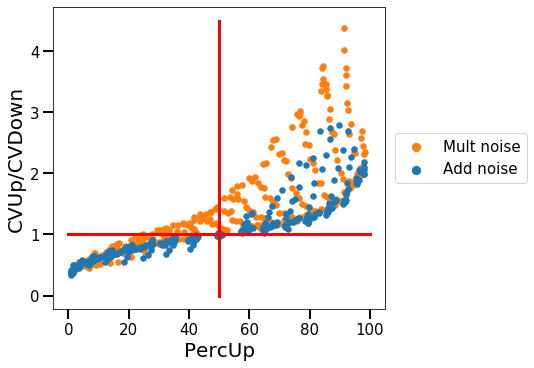

In [51]:
plt.figure(figsize = (7,5))
params = {'figure.figsize': (7,5),
          'lines.linewidth': 4,
          'legend.fontsize': 15,
         'axes.labelsize': 20,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':15,#30
         'ytick.labelsize':15,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)
plt.scatter(data_notnan[0],data_notnan[-4]/data_notnan[-3],label = "Mult noise",s = 30,color = "tab:orange")
plt.scatter(data_notnan_add[0],data_notnan_add[-4]/data_notnan_add[-3],label = "Add noise",s = 30,color = "tab:blue")

plt.plot([0,100],[1,1],color = "red",linewidth = 3)
plt.plot([50,50],[0,4.5],color = "red",linewidth = 3)
plt.xlabel("PercUp")
plt.ylabel("CVUp/CVDown")

plt.legend(markerscale = 1.5,loc='right',
                 bbox_to_anchor=(1.45, 0.5))
#plt.savefig(path_save,dpi=200,bbox_inches='tight')
plt.show()




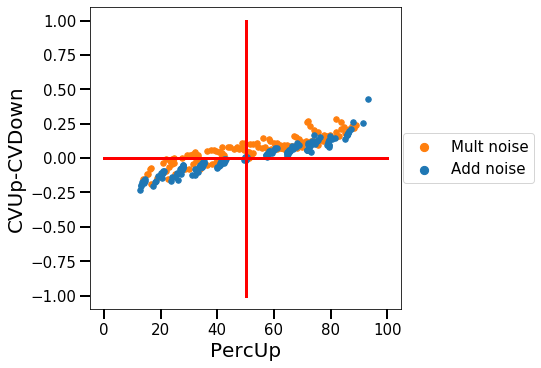

In [52]:
plt.figure(figsize = (7,5))
params = {'figure.figsize': (7,5),
          'lines.linewidth': 4,
          'legend.fontsize': 15,
         'axes.labelsize': 20,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':15,#30
         'ytick.labelsize':15,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)
plt.scatter(data_filtered[0],data_filtered[-4]-data_filtered[-3],label = "Mult noise",s = 30,color = "tab:orange")
plt.scatter(data_filtered_add[0],data_filtered_add[-4]-data_filtered_add[-3],label = "Add noise",s = 30,color = "tab:blue")

plt.plot([0,100],[0,0],color = "red",linewidth = 3)
plt.plot([50,50],[-1,1],color = "red",linewidth = 3)
plt.xlabel("PercUp")
plt.ylabel("CVUp-CVDown")

plt.legend(markerscale = 1.5,loc='right',
                 bbox_to_anchor=(1.45, 0.5))
#plt.savefig(path_save,dpi=200,bbox_inches='tight')
plt.show()



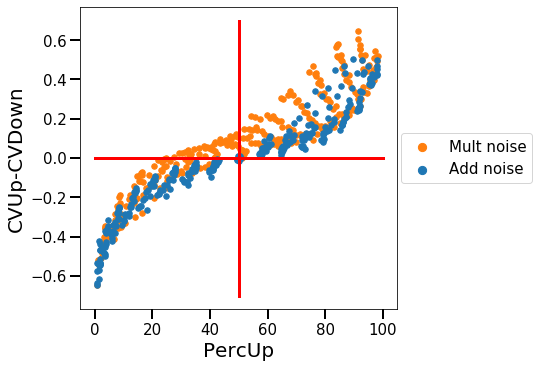

In [53]:
plt.scatter(data_notnan[0],data_notnan[-4]-data_notnan[-3],label = "Mult noise",s = 30,color = "tab:orange")
plt.scatter(data_notnan_add[0],data_notnan_add[-4]-data_notnan_add[-3],label = "Add noise",s = 30,color = "tab:blue")

plt.plot([0,100],[0,0],color = "red",linewidth = 3)
plt.plot([50,50],[-0.7,0.7],color = "red",linewidth = 3)
plt.xlabel("PercUp")
plt.ylabel("CVUp-CVDown")

plt.legend(markerscale = 1.5,loc='right',
                 bbox_to_anchor=(1.45, 0.5))
#plt.savefig(path_save,dpi=200,bbox_inches='tight')
plt.show()

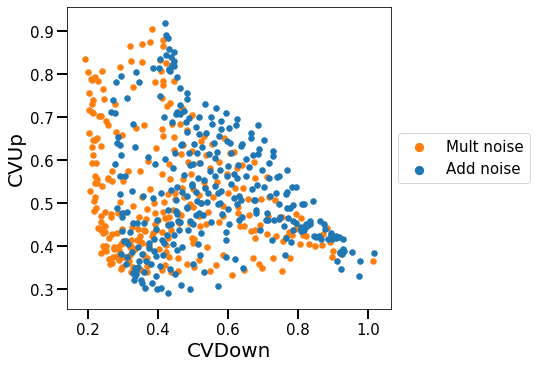

In [57]:
plt.scatter(data_notnan[-3],data_notnan[-4],label = "Mult noise",s = 30,color = "tab:orange")
plt.scatter(data_notnan_add[-3],data_notnan_add[-4],label = "Add noise",s = 30,color = "tab:blue")

#plt.plot([0,100],[0,0],color = "red",linewidth = 3)
#plt.plot([50,50],[-0.7,0.7],color = "red",linewidth = 3)
plt.ylabel("CVUp")
plt.xlabel("CVDown")



plt.legend(markerscale = 1.5,loc='right',
                 bbox_to_anchor=(1.45, 0.5))
#plt.savefig(path_save,dpi=200,bbox_inches='tight')
plt.show()

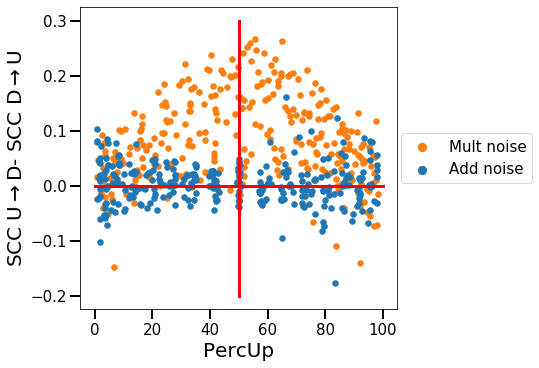

In [236]:
plt.scatter(data_notnan[0],data_notnan[-1]-data_notnan[-2],label = "Mult noise",s = 30,color = "tab:orange")
plt.scatter(data_notnan_add[0],data_notnan_add[-1]-data_notnan_add[-2],label = "Add noise",s = 30,color = "tab:blue")

plt.plot([0,100],[0,0],color = "red",linewidth = 3)
plt.plot([50,50],[-0.2,0.3],color = "red",linewidth = 3)
plt.xlabel("PercUp")
plt.ylabel(r"SCC U$\rightarrow$D- SCC D$\rightarrow$U")

plt.legend(markerscale = 1.5,loc='right',
                 bbox_to_anchor=(1.45, 0.5))
#plt.savefig(path_save,dpi=200,bbox_inches='tight')
plt.show()

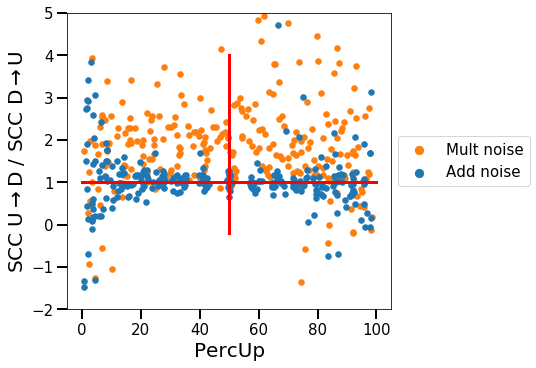

In [244]:
plt.scatter(data_notnan[0],data_notnan[-1]/data_notnan[-2],label = "Mult noise",s = 30,color = "tab:orange")
plt.scatter(data_notnan_add[0],data_notnan_add[-1]/data_notnan_add[-2],label = "Add noise",s = 30,color = "tab:blue")

plt.plot([0,100],[1,1],color = "red",linewidth = 3)
plt.plot([50,50],[-0.2,4],color = "red",linewidth = 3)
plt.xlabel("PercUp")
plt.ylabel(r"SCC U$\rightarrow$D / SCC D$\rightarrow$U")

plt.legend(markerscale = 1.5,loc='right',
                 bbox_to_anchor=(1.45, 0.5))

plt.ylim(-2,5)
#plt.savefig(path_save,dpi=200,bbox_inches='tight')
plt.show()

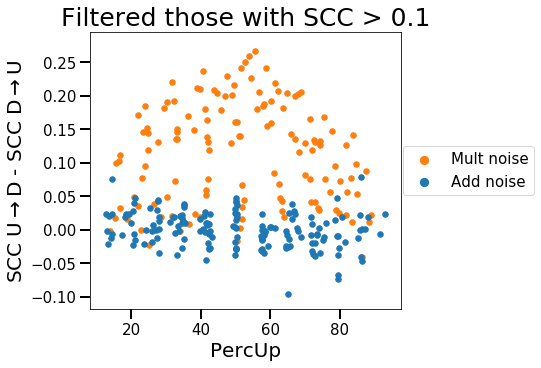

In [248]:
plt.scatter(data_filtered[0],data_filtered[-1]-data_filtered[-2],label = "Mult noise",s = 30,color = "tab:orange")
plt.scatter(data_filtered_add[0],data_filtered_add[-1]-data_filtered_add[-2],label = "Add noise",s = 30,color = "tab:blue")

#plt.plot([0,100],[1,1],color = "red",linewidth = 3)
#plt.plot([50,50],[0,4.5],color = "red",linewidth = 3)
plt.xlabel("PercUp")
plt.ylabel(r"SCC U$\rightarrow$D - SCC D$\rightarrow$U")
plt.title("Filtered those with SCC > 0.1")

plt.legend(markerscale = 1.5,loc='right',
                 bbox_to_anchor=(1.45, 0.5))
#plt.savefig(path_save,dpi=200,bbox_inches='tight')
plt.show()

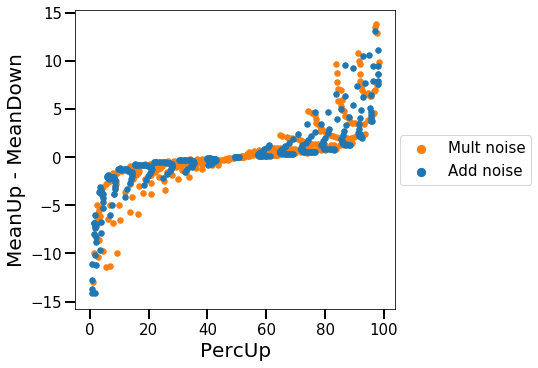

In [254]:
plt.scatter(data_notnan[0],data_notnan[2]-data_notnan[3],label = "Mult noise",s = 30,color = "tab:orange")
plt.scatter(data_notnan_add[0],data_notnan_add[2]-data_notnan_add[3],label = "Add noise",s = 30,color = "tab:blue")

#plt.plot([0,100],[1,1],color = "red",linewidth = 3)
#plt.plot([50,50],[0,4.5],color = "red",linewidth = 3)
plt.xlabel("PercUp")
plt.ylabel("MeanUp - MeanDown")
#plt.title("Filtered those with SCC > 0.1")

plt.legend(markerscale = 1.5,loc='right',
                 bbox_to_anchor=(1.45, 0.5))
#plt.savefig(path_save,dpi=200,bbox_inches='tight')
plt.show()

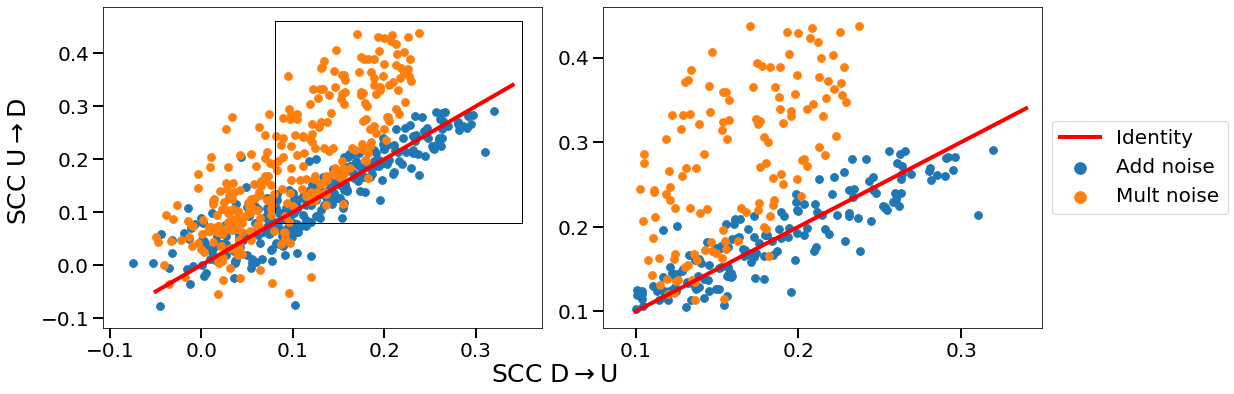

In [255]:
params = {'figure.figsize': (16,6),
          'lines.linewidth': 4,
          'legend.fontsize': 20,
         'axes.labelsize': 25,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':20,#30
         'ytick.labelsize':20,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)

x = np.arange(0.1,0.35,0.01)
x_full = np.arange(-0.05,0.35,0.01)

fig, ax = plt.subplots(1,2,figsize = (14,5),constrained_layout = True)

ax1 = ax[0]
ax2 = ax[1]

ax1.scatter(stats_add[-2],stats_add[-1],label = "Add noise",s = 60,color = "tab:blue")
ax1.scatter(stats_mult[-2],stats_mult[-1],label = "Mult noise",s = 60,color = "tab:orange")
ax1.plot(x_full,x_full,color = "red",label = "Identity")
ax1.set_xticks(np.arange(-0.1,0.35,0.1))
ax1.plot([0.08,0.2,0.35],[0.08,0.08,0.08],color = "black",linewidth = 1)
ax1.plot([0.08,0.08,0.08],[0.1,0.2,0.46],color = "black",linewidth = 1)
ax1.plot([0.08,0.2,0.35],[0.46,0.46,0.46],color = "black",linewidth = 1)
ax1.plot([0.35,0.35,0.35],[0.08,0.2,0.46],color = "black",linewidth = 1)
ax1.set_xlim()
#ax1.fill_between((0.08,0.35), 0.08, 0.46, facecolor='black', alpha=0.2)


ax2.scatter(data_filtered_add[-2],data_filtered_add[-1],s = 60,color = "tab:blue")
ax2.scatter(data_filtered[-2],data_filtered[-1],s = 60,color = "tab:orange")
ax2.plot(x,x,color = "red")
ax2.set_yticks(np.arange(0.1,0.4,0.1))
ax2.set_xticks(np.arange(0.1,0.35,0.1))
ax2.set_xlim(0.08,0.35)
ax2.set_ylim(0.08,0.46)
#ax1.legend(markerscale=1.)#,loc = "center right",bbox_to_anchor=(1.6, 0.5))


leg = fig.legend(markerscale = 1.5,loc='center left',
                 bbox_to_anchor=(1, 0.5), bbox_transform=ax[1].transAxes)

fig.text(-0.03,0.4,r"SCC U$\rightarrow$D",rotation = "vertical",fontsize = 25)
fig.text(0.45,-0.05,r"SCC D$\rightarrow$U",fontsize = 25)

#plt.savefig(path_save,dpi=200,bbox_inches='tight')
plt.show()

